# Einfache Quantilplots

## Hilfsfunktionen

In [1]:
source("../jupyter/util.R")

In [2]:
single_plot <- function(data, color, title, aspect_ratio=1) {
  gg <- ggplot(data, aes(x = x, y = y)) +
      geom_line(color = color, linewidth=1) +
      labs(x = NULL, y = NULL) +   
      ggtitle(title) +
      jupyter_theme() +    
      theme(aspect.ratio=aspect_ratio)
}

In [3]:
combined_plot <- function(distribution, pdf_data, cdf_data, quantile_data) {
  pdf_graph <- single_plot(pdf_data, "blue", "Dichte")
  cdf_graph <- single_plot(cdf_data, "green", "Verteilung")
  quantile_graph <- single_plot(quantile_data, "red", "Quantilplot")

  (pdf_graph | cdf_graph | quantile_graph) +
    plot_annotation( title = distribution, theme = theme(plot.title = element_text(size = 30, hjust = 0.5) ) )
}

In [4]:
combined_plot2 <- function(distribution, x, dfunc, pfunc, qfunc) {
  pdf_data  <- data.frame(x = x, y = dfunc(x))
  cdf_data  <- data.frame(x = x, y = pfunc(x))
  p <- seq(0, 1, length=100)
  quantile_data  <- data.frame(x = p, y = qfunc(p))

  combined_plot(distribution, pdf_data, cdf_data, quantile_data)
}

## Beispiel 1 : Standardnormalverteilung

In [5]:
options(repr.plot.width=25, repr.plot.height=10)

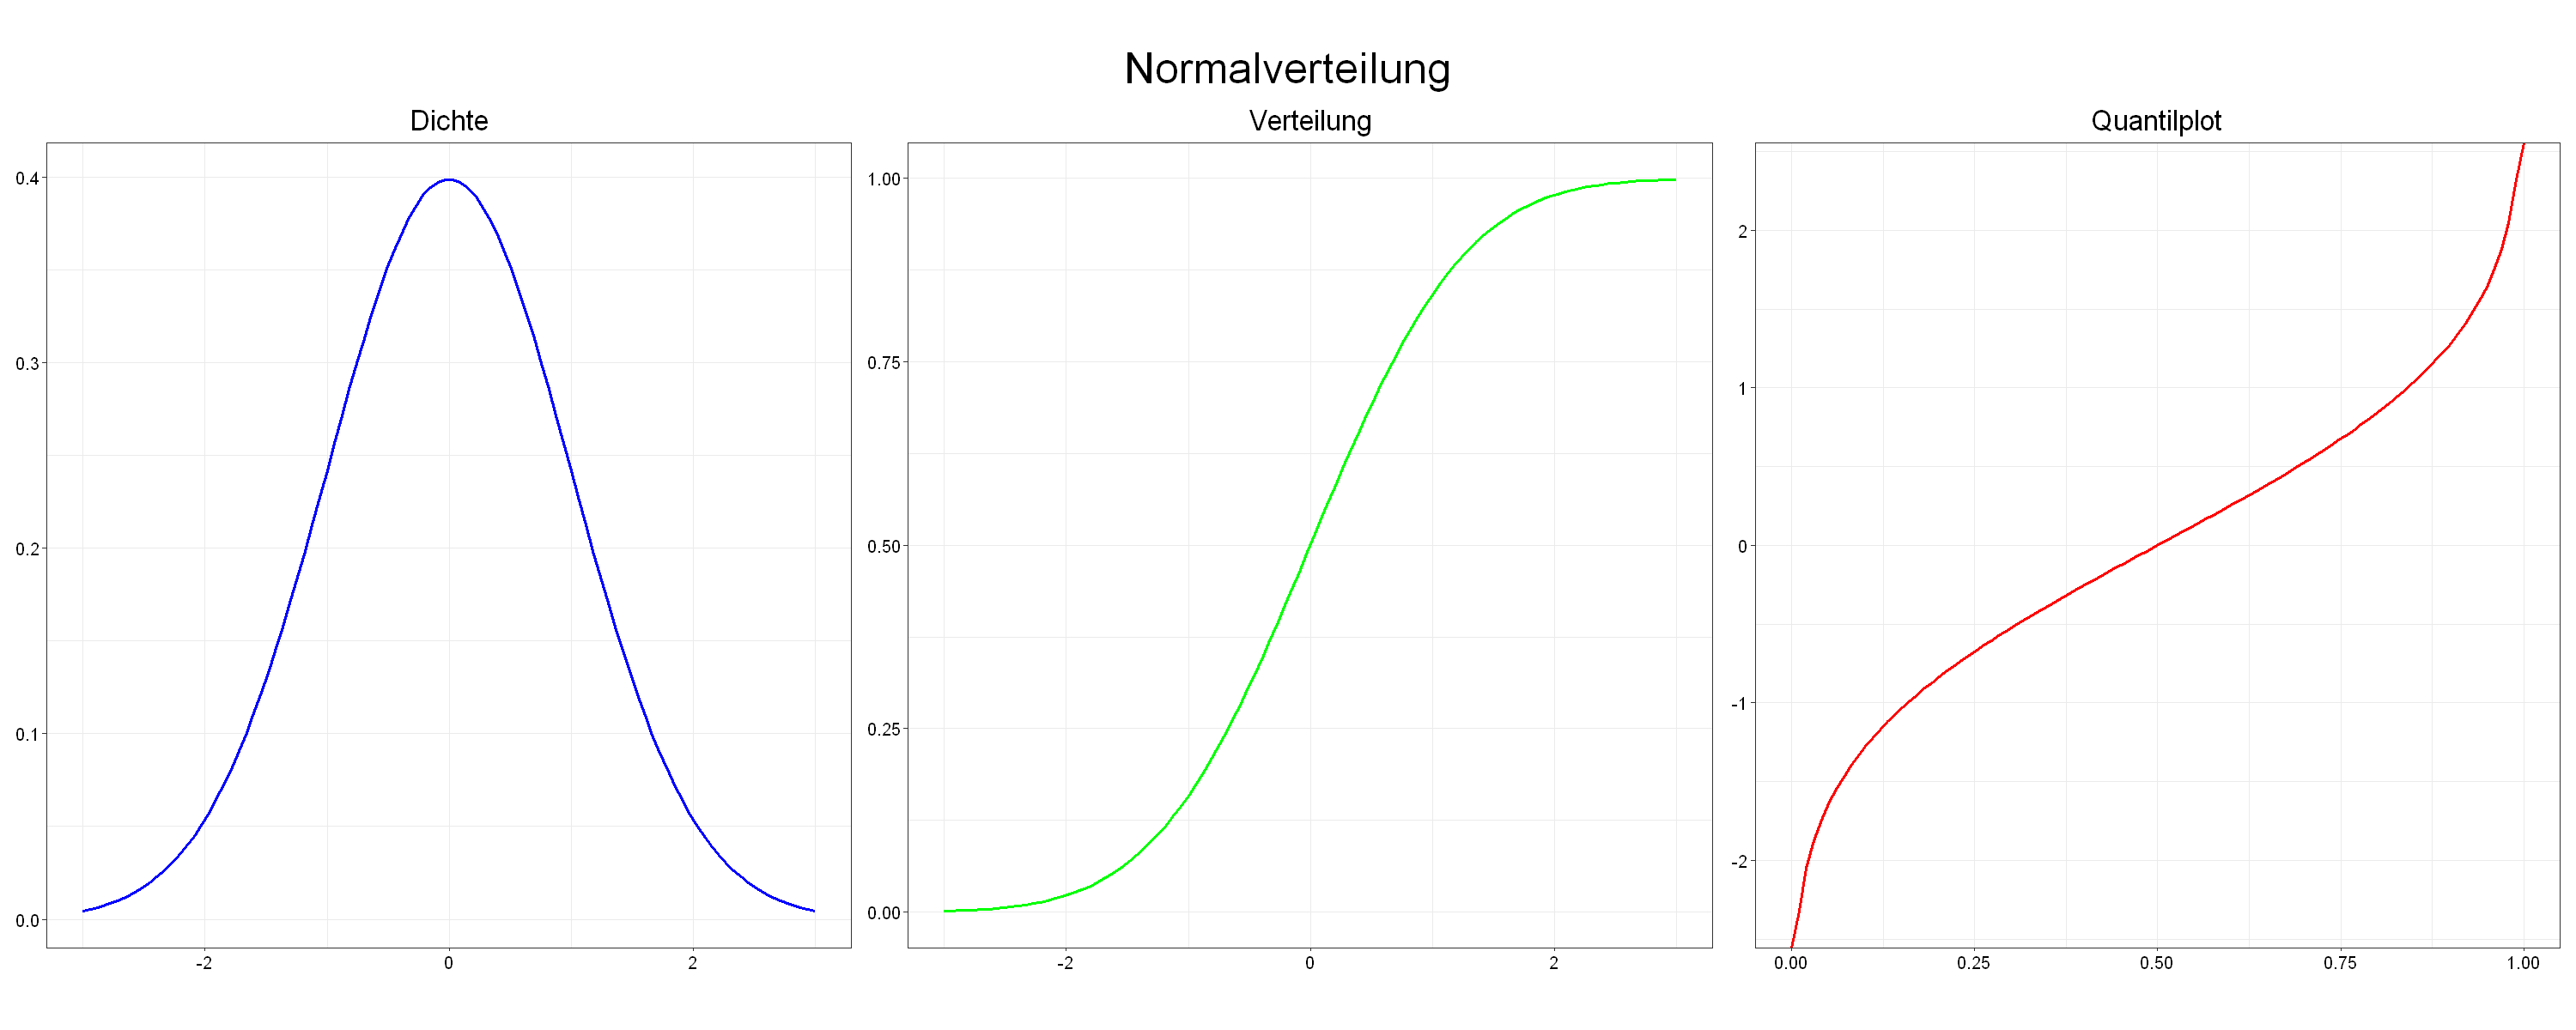

In [6]:
x <- seq(-3, 3, length=100)
combined_plot2("Normalverteilung", 
               x <- seq(-3, 3, length=100), 
               dnorm, 
               pnorm, 
               qnorm)

## Beispiel 2 : Chi-Quadrat-Verteilung - Rechtsschief

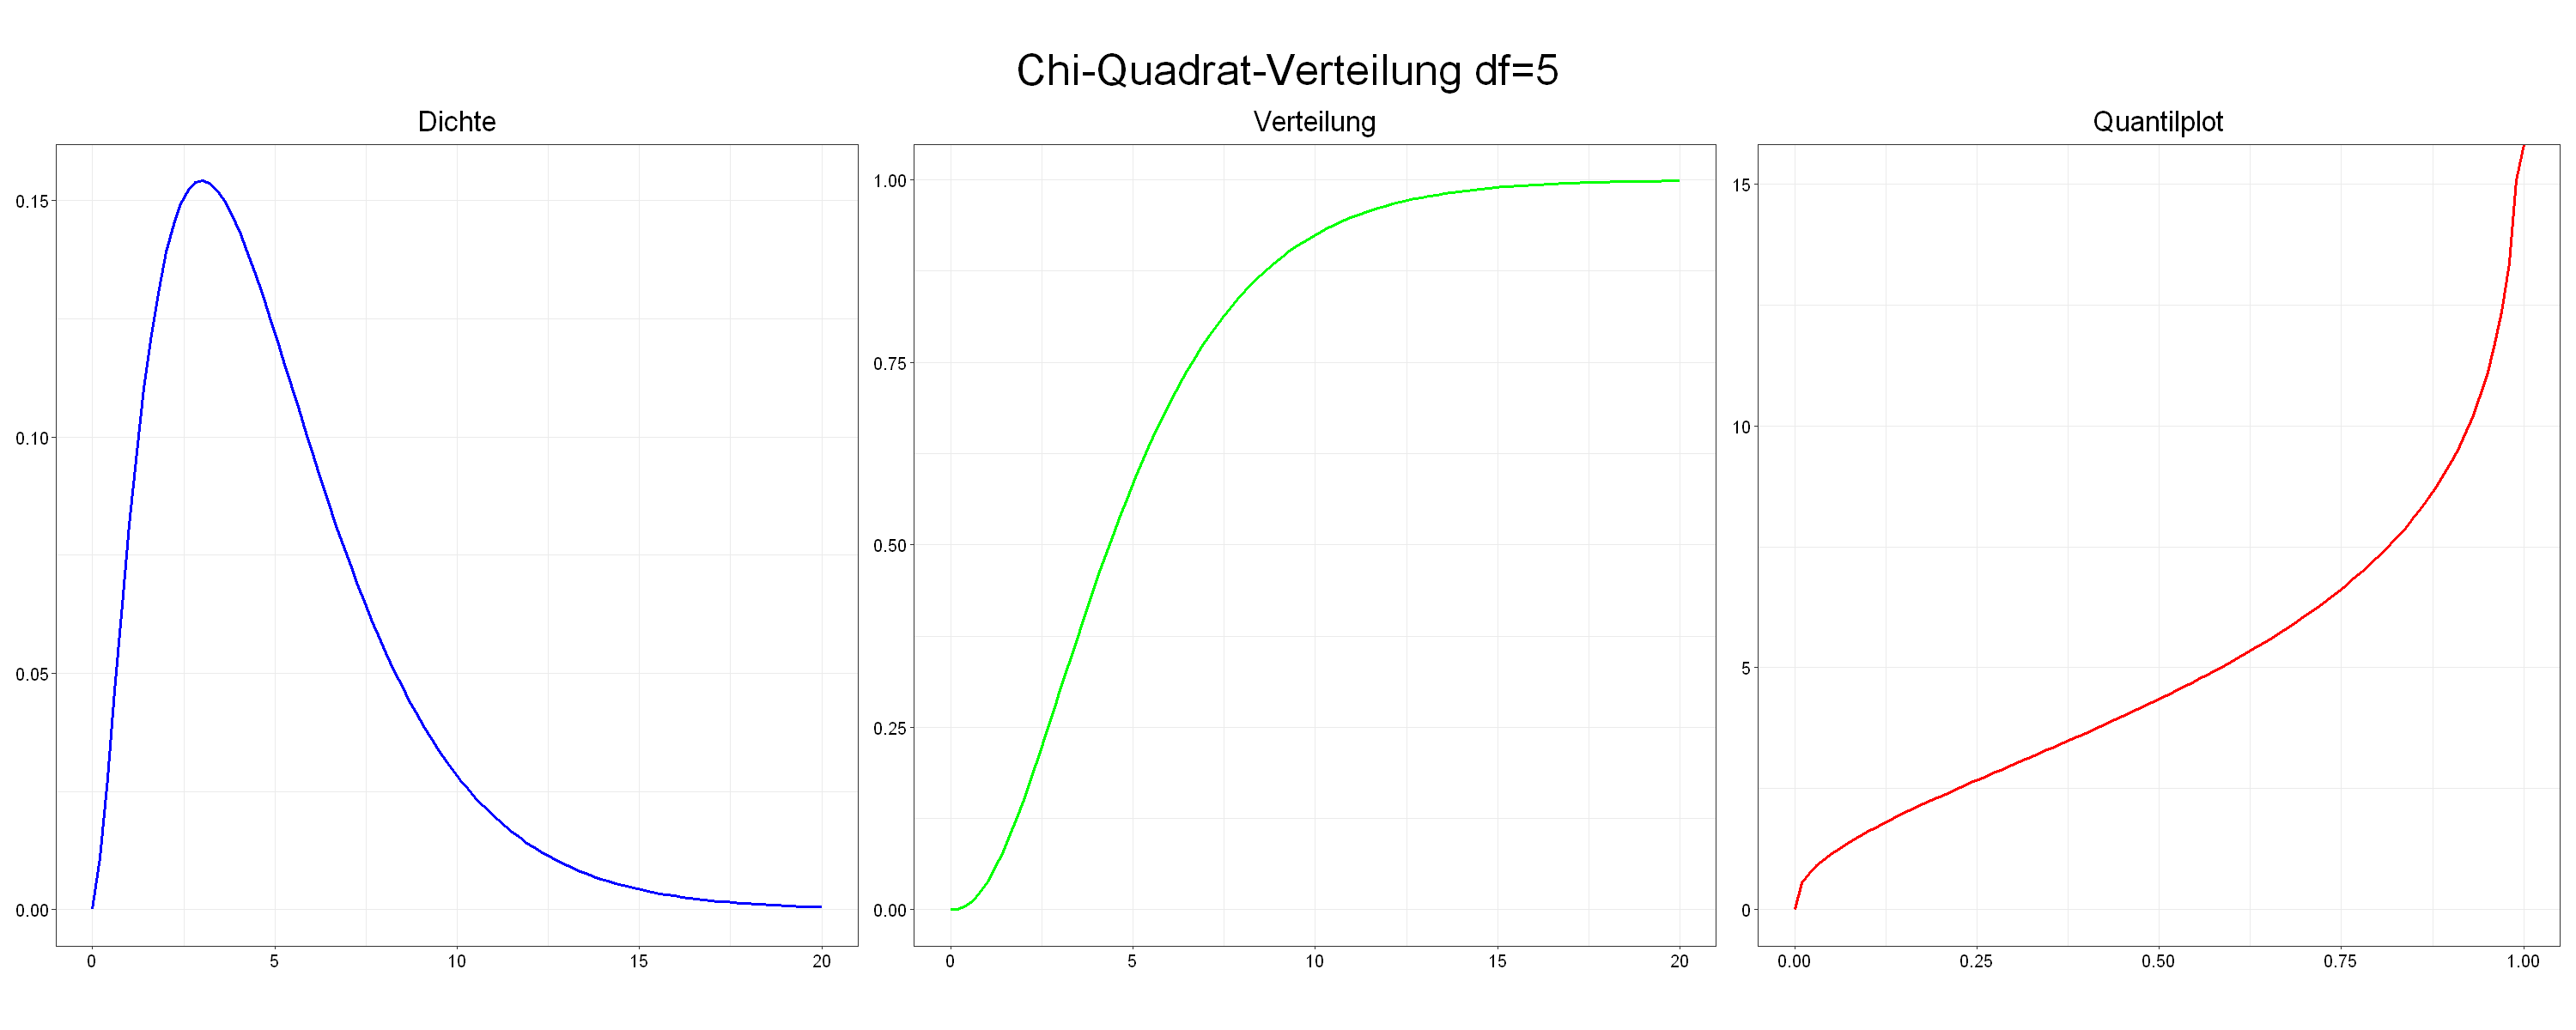

In [7]:
df <- 5
combined_plot2(sprintf("Chi-Quadrat-Verteilung df=%d",df), 
               seq(0, 20, length=100), 
               partial_func(dchisq, df=df), 
               partial_func(pchisq, df=df),  
               partial_func(qchisq, df=df))

## Beispiel 3 : Bimodale Mischverteilung 

s.a. Oldford - Figure 3 (iv)
$$
Y \sim \frac{1}{2} N(0,1) + \frac{1}{2} N(6,1)
$$

Simulation Mischverteilung

In [8]:
mu1 <- 0
sigma1 <- 1
mu2 <- 6
sigma2 <- 1

a <- 0.5
b <- 0.5

n <- 100000
set.seed(123)
component1 <- rnorm(n, mean = mu1, sd = sigma1)
component2 <- rnorm(n, mean = mu2, sd = sigma2)
mixture_data <- ifelse(runif(n) < 0.5, component1, component2) # generiere Werte aus [0,1] der Gleichverteilung

Empirische Dichtefunktion

In [9]:
density_estimate <- density(mixture_data)
empirical_pdf <- approxfun(density_estimate$x, density_estimate$y)

Empirische Verteilungsfunktion

In [10]:
empirical_cdf = ecdf(mixture_data)

Auswertung PDF und CDF

In [11]:
x <- seq(-3, 10, length=100)
pdf_data <- data.frame(x = x, y = empirical_pdf(x))
# alternativ : pdf <- a * dnorm(x, mean = mu1, sd = sigma1) + b * dnorm(x, mean = mu2, sd = sigma2)
cdf_data <- data.frame(x = x, y = empirical_cdf(x))
# alternativ : cdf <- a * pnorm(x, mean = mu1, sd = sigma1) + b * pnorm(x, mean = mu2, sd = sigma2)

Quantile

In [12]:
p <- seq(0, 1, length=100)
quantile_data <- data.frame(x = p, y = quantile(mixture_data, p))

Plot

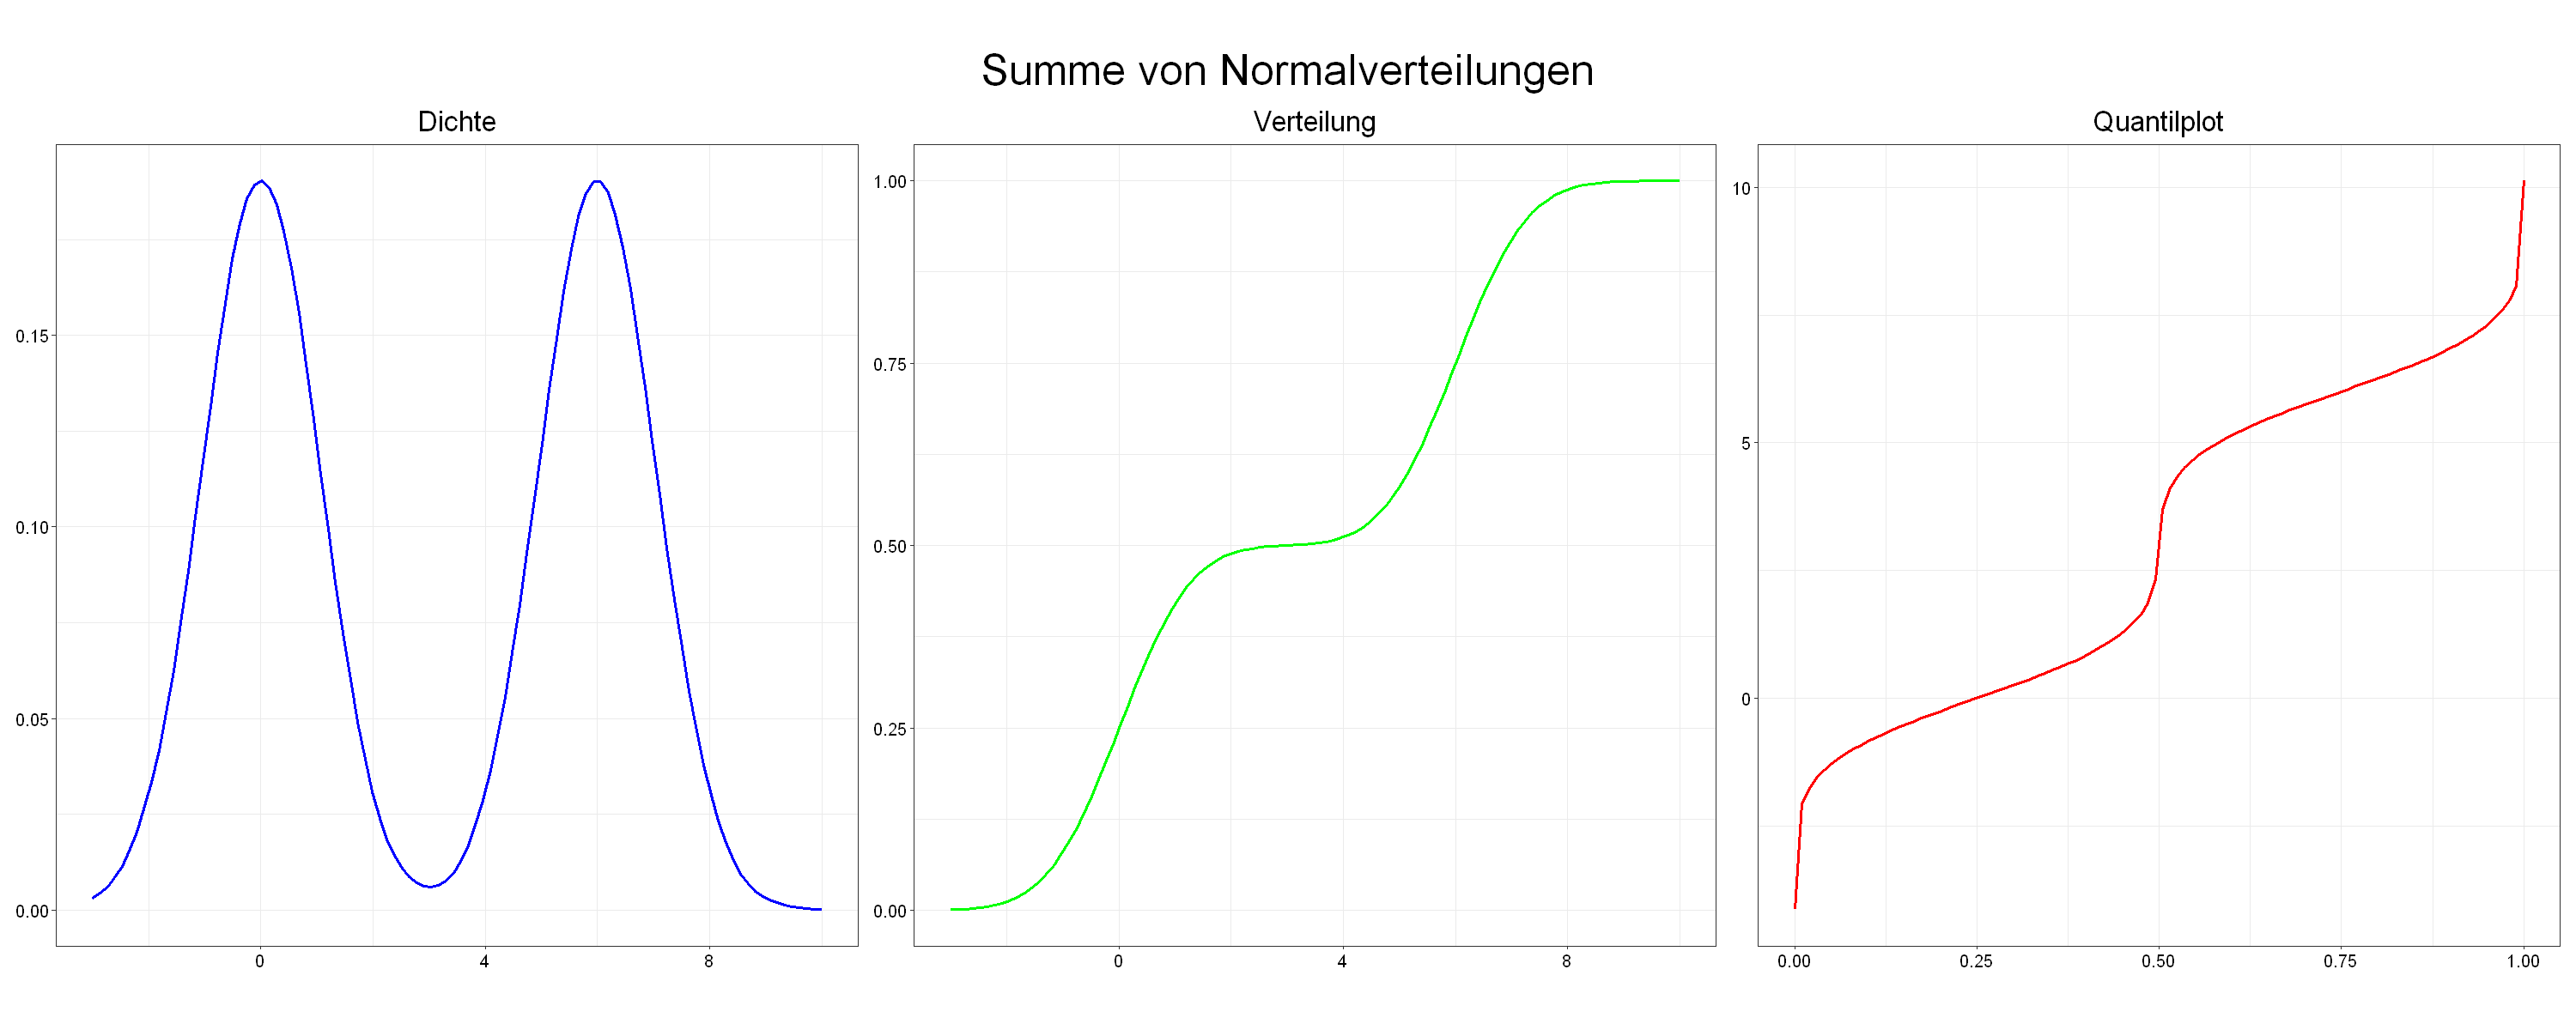

In [13]:
combined_plot("Summe von Normalverteilungen", pdf_data, cdf_data, quantile_data)